In [1]:
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt

In [2]:
# pre-processing: count and sort by the number of instances of each category
sorted_counts = df['cat_var'].value_counts()

# establish the Figure
plt.figure(figsize = [12, 5])

# left plot: pie chart
plt.subplot(1, 2, 1)
plt.pie(sorted_counts, labels = sorted_counts.index, startangle = 90,
        counterclock = False);
plt.axis('square');

# right plot: horizontally stacked bar
plt.subplot(1, 2, 2)
baseline = 0
for i in range(sorted_counts.shape[0]):
    plt.barh(y = 1, width = sorted_counts[i], left = baseline)
    baseline += sorted_counts[i]

plt.legend(sorted_counts.index)  # add a legend for labeling
plt.ylim([0,2]) # give some vertical spacing around the bar

NameError: name 'df' is not defined

NameError: name 'df' is not defined

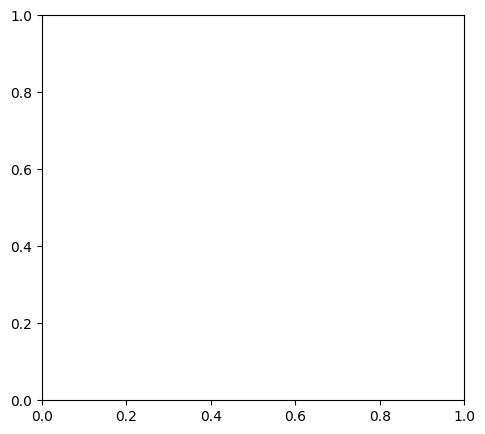

In [3]:
cat1_order = ['East', 'South', 'West', 'North']
cat2_order = ['Type X', 'Type Y', 'Type Z', 'Type O']

plt.figure(figsize = [12, 5])

# left plot: clustered bar chart, absolute counts
plt.subplot(1, 2, 1)
sb.countplot(data = df, x = 'cat_var1', hue = 'cat_var2',
             order = cat1_order, hue_order = cat2_order)
plt.legend()

# right plot: stacked bar chart, absolute counts
plt.subplot(1, 2, 2)

baselines = np.zeros(len(cat1_order))
# for each second-variable category:
for i in range(len(cat2_order)):
    # isolate the counts of the first category,
    cat2 = cat2_order[i]
    inner_counts = df[df['cat_var2'] == cat2]['cat_var1'].value_counts()
    # then plot those counts on top of the accumulated baseline
    plt.bar(x = np.arange(len(cat1_order)), height = inner_counts[cat1_order],
            bottom = baselines)
    baselines += inner_counts[cat1_order]
    
plt.xticks(np.arange(len(cat1_order)), cat1_order)
plt.legend(cat2_order)

In [4]:
artists = [] # for storing references to plot elements
baselines = np.zeros(len(cat1_order))
cat1_counts = df['cat_var1'].value_counts()

# for each second-variable category:
for i in range(len(cat2_order)):
    # isolate the counts of the first category,
    cat2 = cat2_order[i]
    inner_counts = df[df['cat_var2'] == cat2]['cat_var1'].value_counts()
    inner_props = inner_counts / cat1_counts
    # then plot those counts on top of the accumulated baseline
    bars = plt.bar(x = np.arange(len(cat1_order)),
                   height = inner_props[cat1_order],
                   bottom = baselines)
    artists.append(bars)
    baselines += inner_props[cat1_order]
    
plt.xticks(np.arange(len(cat1_order)), cat1_order)
plt.legend(reversed(artists), reversed(cat2_order), framealpha = 1,
           bbox_to_anchor = (1, 0.5), loc = 6);

NameError: name 'df' is not defined